
# PROYECTO DETECCIÓN DE ARMAS DE FUEGO EN SECUENCIAS DE VIDEO
---
Integrantes:


*   Juan David Marín
*   Mateo Ortiz Cruzate


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Librerìas necesarias
import zipfile
import os
from PIL import Image
import glob
from google.colab import files
from IPython.display import Image
import numpy as np

## Extrayendo los .zips (no correr de nuevo)

In [ ]:
# Ruta del archivo comprimido del dataset
dataset_zip_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/YouTube-GDD.zip'
# Extraer el contenido en la carpeta de dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset')


In [ ]:
# Ruta del archivo comprimido de labels
labels_zip_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/YouTube-GDD_test_labels.zip'
# Extraer el contenido en la carpeta de labels
with zipfile.ZipFile(labels_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/IA2/Proyecto/labels')


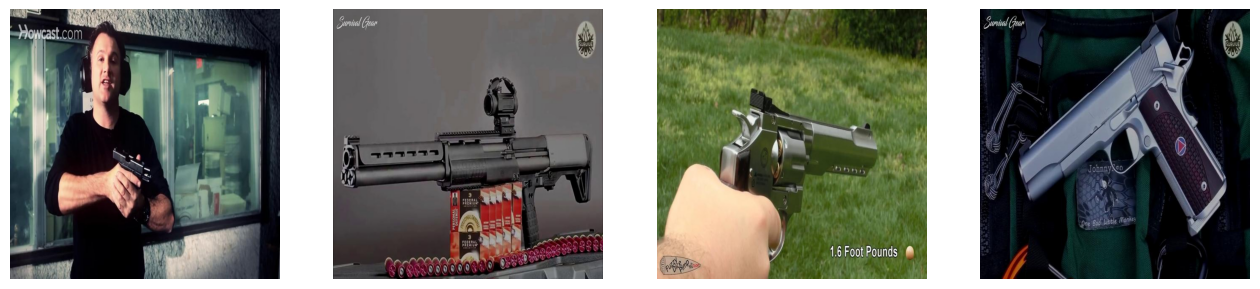

In [3]:
# Some plots
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def plot_multple_examples(cohort:'str', normalized:bool):
  # plot multiple images
  def plot_images(image_paths):
      fig, axes = plt.subplots(1, 4, figsize=(16, 4))

      for ax, image_path in zip(axes, image_paths):
          img = Image.open(image_path)
          img_array = np.array(img)
          ax.imshow(img_array)
          ax.axis('off')

      plt.show()
  if normalized == False:
    folder = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/'
  else:
    folder = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/'

  if cohort == 'test':
    folder = folder + 'test/'
  elif cohort == 'train':
    folder = folder + 'train/'
  elif cohort == 'val':
    folder = folder + 'val/'



  test_image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
  # print(len(test_image_files))
  # print(folder)
  random_images = random.sample(test_image_files, 4)

  plot_images(random_images)

plot_multple_examples('test', False)



## Redimensionando las imagenes (No correr de nuevo)

In [ ]:
from PIL import Image
import numpy as np
import glob

def normalization(image):
    img_array = np.array(image, dtype=np.float32)
    img_normalized = img_array / 255.0 # RGB
    return Image.fromarray((img_normalized * 255).astype(np.uint8))

def resize_and_normalize_images(path, size=(640, 640)):
    for image_path in glob.glob(f"{path}/*.jpg"):
        img = Image.open(image_path)
        img = img.resize(size)
        img = normalization(img)
        img.save(image_path)

# Apply resizing and normalization to train, val, and test
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/train')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/val')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/test')



Verificando Preprocesamiento

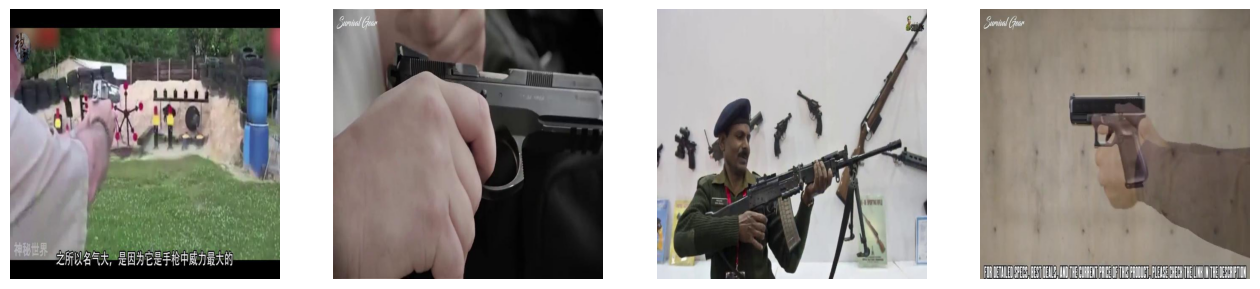

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

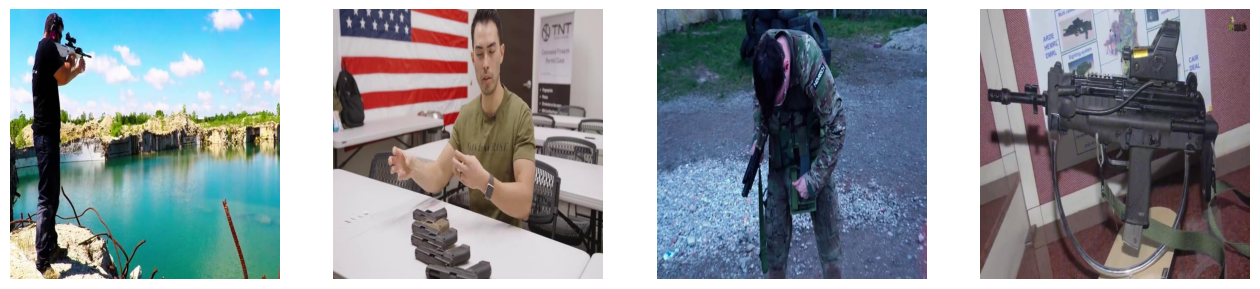

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

# Instalando YOLOv11

In [4]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

!pip install ultralytics

from ultralytics import YOLO

# Ejemplo de inicialización
# model = YOLO('yolov11n.pt')  # Cambiar por yolov11s.pt, etc., si es necesario.


Cloning into 'ultralytics'...
remote: Enumerating objects: 45193, done.
remote: Counting objects: 100% (859/859), done.
remote: Compressing objects: 100% (593/593), done.
remote: Total 45193 (delta 557), reused 445 (delta 266), pack-reused 44334 (from 1)
Receiving objects: 100% (45193/45193), 38.62 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (33497/33497), done.
/content/ultralytics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 48.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Archivo .yaml necesario

In [5]:
dataset_yaml = """
path: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/
train: images/train
val: images/val
test: images/test
nc: 2
names: ['person', 'gun']
"""
with open("/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml", "w") as file:
    file.write(dataset_yaml)


## Yolov11n

In [6]:
from ultralytics import YOLO

# Cargar el modelo YOLOv11n
model = YOLO('/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/yolo/yolo11m.pt')

# Entrenar el modelo
model.train(data='/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml',
            epochs=20,
            batch=16,
            imgsz=640)


100%|██████████| 38.8M/38.8M [00:00<00:00, 241MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/yolo/yolo11m.pt, data=/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 396MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/train... 4000 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [55:00<00:00,  1.21it/s]


train: New cache created: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [06:49<00:00,  1.22it/s]


val: New cache created: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val.cache
Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.75G      1.241      1.729        1.6         66        640: 100%|██████████| 250/250 [02:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.56it/s]

                   all        500       1133      0.356       0.33      0.286     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.74G      1.481      1.941      1.805         85        640: 100%|██████████| 250/250 [02:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        500       1133      0.318      0.487      0.351      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.77G      1.415      1.864      1.761         68        640: 100%|██████████| 250/250 [02:30<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.93it/s]

                   all        500       1133      0.365      0.453      0.336      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.74G      1.342      1.788       1.71         72        640: 100%|██████████| 250/250 [02:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

                   all        500       1133      0.524      0.525      0.542      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.72G      1.253      1.649      1.629         65        640: 100%|██████████| 250/250 [02:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]

                   all        500       1133       0.62      0.549      0.594      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.76G        1.2      1.562      1.591         69        640: 100%|██████████| 250/250 [02:27<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        500       1133      0.655      0.522      0.599      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.72G      1.123      1.451      1.535         86        640: 100%|██████████| 250/250 [02:26<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        500       1133      0.702      0.633      0.678       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.75G      1.074      1.371      1.499        107        640: 100%|██████████| 250/250 [02:26<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        500       1133      0.779       0.63       0.71       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.56G      1.031      1.299      1.466         79        640: 100%|██████████| 250/250 [02:27<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        500       1133      0.809      0.654      0.732      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.74G      1.002      1.265      1.453         86        640: 100%|██████████| 250/250 [02:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.62it/s]

                   all        500       1133      0.763      0.673      0.732      0.502


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       8.7G      0.985      1.119      1.478         33        640: 100%|██████████| 250/250 [02:26<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        500       1133      0.775      0.704      0.758      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.74G     0.9451      1.061      1.444         35        640: 100%|██████████| 250/250 [02:25<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.65it/s]

                   all        500       1133      0.795      0.689      0.762      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       8.7G     0.9149      1.007      1.407         31        640: 100%|██████████| 250/250 [02:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        500       1133      0.834      0.698      0.779       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.74G     0.8636     0.9228      1.372         34        640: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.60it/s]

                   all        500       1133       0.81      0.675      0.761      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.69G     0.8358     0.8917      1.349         56        640: 100%|██████████| 250/250 [02:25<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]

                   all        500       1133      0.845       0.74      0.815      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.74G     0.7886     0.8295      1.308         37        640: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        500       1133      0.861      0.728      0.811       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.69G     0.7479     0.7872      1.276         35        640: 100%|██████████| 250/250 [02:25<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        500       1133      0.846       0.77      0.826      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.74G     0.7089     0.7369      1.243         36        640: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        500       1133      0.873      0.778      0.845      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.69G     0.6862     0.6955      1.227         33        640: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]

                   all        500       1133      0.882      0.777      0.847      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.74G     0.6529     0.6657      1.204         34        640: 100%|██████████| 250/250 [02:27<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all        500       1133      0.862      0.783      0.842      0.679



20 epochs completed in 0.883 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 40.5MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.60it/s]


                   all        500       1133      0.862      0.783      0.842      0.678
                person        373        415      0.923      0.904      0.954      0.827
                   gun        497        718        0.8      0.662       0.73       0.53
Speed: 0.3ms preprocess, 10.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789831d2a1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Validación

In [7]:
# Realizar la validación
metrics = model.val()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:20<00:00,  1.54it/s]


                   all        500       1133      0.862      0.783      0.842      0.679
                person        373        415      0.923      0.904      0.954      0.827
                   gun        497        718        0.8      0.662      0.731       0.53
Speed: 0.6ms preprocess, 23.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train2


In [8]:
results = model.predict(source='/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test', conf=0.25, save=True)


image 1/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000004.jpg: 640x640 1 gun, 37.1ms
image 2/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000021.jpg: 640x640 1 gun, 37.1ms
image 3/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000036.jpg: 640x640 2 persons, 2 guns, 37.1ms
image 4/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OSOpvoUTO6A_30_60_000042.jpg: 640x640 2 guns, 37.7ms
image 5/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OZBMKa15laA_30_60_000014.jpg: 640x640 1 gun, 37.0ms
image 6/500 /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/images/normalized/test/OZBMKa15laA_30_60_000059.jpg: 

In [10]:
import shutil

source_path = 'runs/'
destination_path = '/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/Yolom_Results/'

shutil.copytree(source_path, destination_path)

'/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/Yolom_Results/'

<p align="center">
    <img src="https://drive.google.com/uc?id=1NONjEOsUawFP5nESsD5cRvy01GyLJinp" width="800">
</p>
